advertising.csv dosyasında TV, Radyo ve Gazete ilanlarına göre satış rakamları var.
Buradan Sales Sütunu hedef yani y=df['Sales']. 
TV , radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevap arayacaksınız ve 
Hangi reklam yönteminin daha başarılı olduğunu bulacaksınız. 
Test olarak ayırdığınız veri ile tahmin ettiğiniz veriyi aynı grafikte line chart ile görselleştireceksiniz.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [2]:
def algo_test(dataset,y_name):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        
        #Regressor yaparken sütun bölmemiz gerekir.x ve y sütunlarını ayırıyorum.
        #y hedef sütunum bu nedenle x ten y sütununu ayırmam gerekir.
        
        x=dataset.drop(columns=[y_name],axis=1)
        #x e eşitlemeden önce hedefi çıkarıyorum
        #axis=1 dediği için sütunlar üzerinde işlem yapar
        y=dataset[y_name]
        
        #test_size=.1 çünkü verim çok az
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=13)
        
        #Algoritmaları bir listeye atıyoruz
        algos=[L,R,Lass,E,ETR,GBR]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting']
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        print(rtable)
        ax=plt.plot(x_test,p)
        ax=plt.plot(x_test,y_test)
        return ax

In [3]:
df=pd.read_csv('advertising.csv')

In [4]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.sample(10)

,TV,Radio,Newspaper,Sales
199,232.1,8.6,8.7,13.4
5,8.7,48.9,75.0,7.2
122,224.0,2.4,15.6,11.6
91,28.6,1.5,33.0,7.3
42,293.6,27.7,1.8,20.7
108,13.1,0.4,25.6,5.3
196,94.2,4.9,8.1,9.7
37,74.7,49.4,45.7,14.7
54,262.7,28.8,15.9,20.2
79,116.0,7.7,23.1,11.0


In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [12]:
df.corr()['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

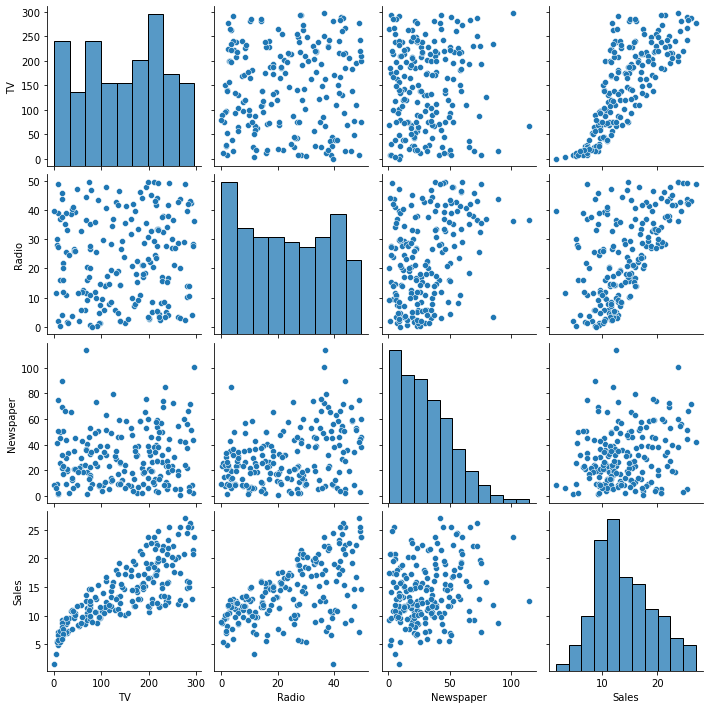

In [13]:
sns.pairplot(data=df);

                   R_Squared      RMSE       MAE
Gradient Boosting   0.987367  0.640618  0.513089
Extra Tree          0.950762  1.264713  0.925000
Linear              0.933204  1.473054  1.210496
Ridge               0.933202  1.473073  1.210503
ElasticNet          0.932482  1.480995  1.212372
Lasso               0.931602  1.490618  1.215715


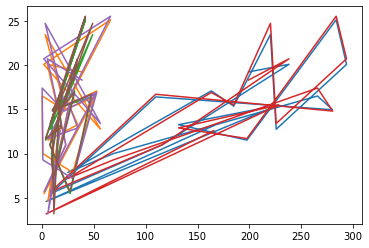

In [14]:
a=pd.DataFrame(df,columns=['TV','Newspaper','Radio','Sales'])
dx=algo_test(a,'Sales')
dx

                   R_Squared      RMSE       MAE
Lasso               0.021476  5.638050  4.456597
ElasticNet          0.021399  5.638272  4.454060
Ridge               0.021279  5.638619  4.451235
Linear              0.021279  5.638620  4.451234
Gradient Boosting  -0.202307  6.249583  5.209790
Extra Tree         -0.870917  7.795977  6.180000


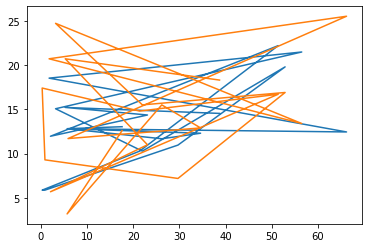

In [15]:
x=pd.DataFrame(df,columns=['Newspaper','Sales'])
ax=algo_test(x,'Sales')
ax

                   R_Squared      RMSE       MAE
Linear              0.656180  3.342017  2.764733
Ridge               0.656180  3.342018  2.764733
ElasticNet          0.656045  3.342676  2.765365
Lasso               0.655919  3.343288  2.765941
Gradient Boosting   0.545916  3.840709  3.189640
Extra Tree          0.406962  4.389191  3.580000


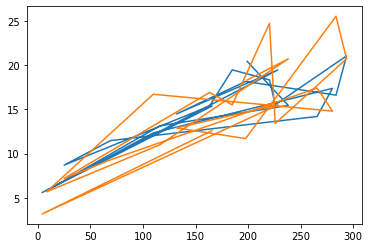

In [16]:
y=pd.DataFrame(df,columns=['TV','Sales'])
bx=algo_test(y,'Sales')
bx

                   R_Squared      RMSE       MAE
Gradient Boosting   0.428580  4.308448  3.241871
Linear              0.395858  4.430091  3.605726
Ridge               0.395853  4.430109  3.605726
ElasticNet          0.393111  4.440153  3.605722
Lasso               0.391204  4.447124  3.605720
Extra Tree          0.231036  4.998000  3.920000


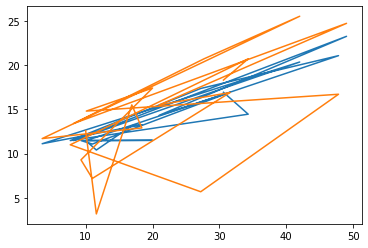

In [17]:
z=pd.DataFrame(df,columns=['Radio','Sales'])
cx=algo_test(z,'Sales')
cx